<a href="https://colab.research.google.com/github/MuhammadAwon/backyard-projects/blob/main/intro-to-deep-learning/transfer_learning_scaling_up/06_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛠 Exercises

## Getting the data and model ready

In [ ]:
# Import dependencies
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

In [ ]:
# Get the helper functions
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# Import series of helper functions
from helper_functions import plot_loss_curves, unzip_data, compare_historys, walk_through_dir, load_and_prep_image, pred_and_plot

--2021-12-14 09:10:45--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-12-14 09:10:45 (47.9 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [ ]:
# Download data from Google Storage
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip 

# Unzip data
unzip_data('101_food_classes_10_percent.zip')

--2021-12-14 08:20:33--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.125.128, 142.250.157.128, 142.251.8.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip’

101_food_classes_10 100%[===================>]   1.51G  82.1MB/s    in 12s     

2021-12-14 08:20:46 (125 MB/s) - ‘101_food_classes_10_percent.zip’ saved [1625420029/1625420029]



In [ ]:
# Walk through the root directory
walk_through_dir('101_food_classes_10_percent')

There are 2 directories and 0 images in '101_food_classes_10_percent'.
There are 101 directories and 0 images in '101_food_classes_10_percent/train'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/takoyaki'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/french_toast'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/beef_carpaccio'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/hot_dog'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/omelette'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/frozen_yogurt'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/spaghetti_bolognese'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/fish_and_chips'.
There are 0 directories and 75 images i

In [ ]:
# Create checkpoint callback to save model for later use
checkpoint_path = '10_percent_data_model_checkpoint'
callback_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         monitor='val_accuracy',
                                                         save_weights_only=True,
                                                         save_best_only=True)

In [ ]:
# Set train and test path
train_dir = '101_food_classes_10_percent/train'
test_dir = '101_food_classes_10_percent/test'

In [ ]:
# Load data for training and testing (trun images into tensors)
# Set image size
IMG_SIZE = (224, 224)

# Create train data
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 label_mode='categorical',
                                                                 image_size=IMG_SIZE)

# Create test data
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode='categorical',
                                                                image_size=IMG_SIZE,
                                                                shuffle=False)

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


In [ ]:
# Import base model
base_model = tf.keras.applications.efficientnet.EfficientNetB1(include_top=False)
base_model.trainable = False

# Setup model architecture with trainable top layers
inputs = layers.Input(shape=IMG_SIZE+(3,), name='input_layer')
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D(name='global_avg_pooling_2D')(x)
outputs = layers.Dense(len(train_data_10_percent.class_names), activation='softmax', name='output_layer')(x)

# Build model
model_0 = tf.keras.Model(inputs, outputs, name='model_0')

# Check model summary
model_0.summary()

27033600/27018416 [==============================] - 1s 0us/step
Model: "model_0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb1 (Functional)  (None, None, None, 1280)  6575239  
                                                                 
 global_avg_pooling_2D (Glob  (None, 1280)             0         
 alAveragePooling2D)                                             
                                                                 
 output_layer (Dense)        (None, 101)               129381    
                                                                 
Total params: 6,704,620
Trainable params: 129,381
Non-trainable params: 6,575,239
_________________________________________________________________


In [ ]:
# Compile the model
model_0.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_model_0 = model_0.fit(train_data_10_percent,
                              epochs=5,
                              steps_per_epoch=len(train_data_10_percent),
                              validation_data=test_data,
                              validation_steps=int(0.15*len(test_data)),
                              callbacks=[callback_checkpoint])

Epoch 1/5
237/237 [==============================] - 84s 275ms/step - loss: 3.0948 - accuracy: 0.3287 - val_loss: 2.3891 - val_accuracy: 0.4563
Epoch 2/5
237/237 [==============================] - 63s 263ms/step - loss: 1.7766 - accuracy: 0.5949 - val_loss: 1.9715 - val_accuracy: 0.5249
Epoch 3/5
237/237 [==============================] - 63s 263ms/step - loss: 1.3606 - accuracy: 0.6853 - val_loss: 1.8338 - val_accuracy: 0.5400
Epoch 4/5
237/237 [==============================] - 63s 264ms/step - loss: 1.1099 - accuracy: 0.7486 - val_loss: 1.7602 - val_accuracy: 0.5482
Epoch 5/5
237/237 [==============================] - 63s 263ms/step - loss: 0.9267 - accuracy: 0.8012 - val_loss: 1.7234 - val_accuracy: 0.5527


In [ ]:
# Evaluate model
results_feature_extraction_model_0 = model_0.evaluate(test_data)
results_feature_extraction_model_0

790/790 [==============================] - 140s 177ms/step - loss: 1.5185 - accuracy: 0.5994


[1.518483281135559, 0.599366307258606]

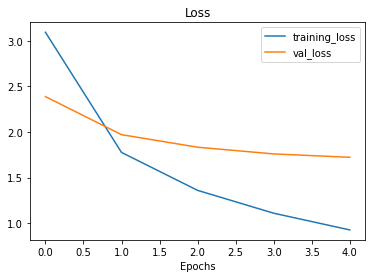

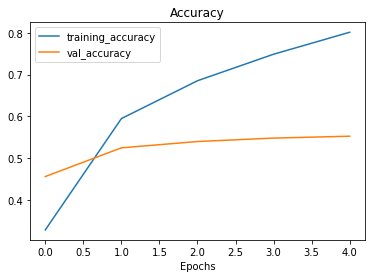

In [ ]:
# Plot the loss curve
plot_loss_curves(history_model_0)

## Fine-tuning

In [ ]:
# Unfreeze all layers in the base model
base_model.trainable = True

# Refreeze every layer except for the last 7
for layer in base_model.layers[:-7]:
  layer.trainable = False

In [ ]:
# Check which layers are trainable
for layer_num, layer in enumerate(base_model.layers):
  print(layer_num, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block1b_dwconv False
18 block1b_bn False
19 block1b_activation False
20 block1b_se_squeeze False
21 block1b_se_reshape False
22 block1b_se_reduce False
23 block1b_se_expand False
24 block1b_se_excite False
25 block1b_project_conv False
26 block1b_project_bn False
27 block1b_drop False
28 block1b_add False
29 block2a_expand_conv False
30 block2a_expand_bn False
31 block2a_expand_activation False
32 block2a_dwconv_pad False
33 block2a_dwconv False
34 block2a_bn False
35 block2a_activation False
36 block2a_se_squeeze False
37 block2a_se_reshape False
38 block2a_se_reduce False
39 block2a_se_ex

In [ ]:
# Compile the model
model_0.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(0.001/10),  # 10x lower learning rate than default, 0.001/10 == 1e-4
                metrics=['accuracy'])

In [ ]:
# Fine-tune for 5 more epochs
initial_epochs = 5
fine_tune_epochs = initial_epochs + 5 # model has already trained with 5 epochs

# Fit the model
history_model_0_fine_tune = model_0.fit(train_data_10_percent,
                                        epochs=fine_tune_epochs,
                                        validation_data=test_data,
                                        validation_steps=int(0.15*len(test_data)),
                                        initial_epoch=history_model_0.epoch[-1])

Epoch 5/10
237/237 [==============================] - 76s 277ms/step - loss: 0.6598 - accuracy: 0.8397 - val_loss: 1.6963 - val_accuracy: 0.5614
Epoch 6/10
237/237 [==============================] - 64s 267ms/step - loss: 0.4996 - accuracy: 0.8811 - val_loss: 1.7220 - val_accuracy: 0.5630
Epoch 7/10
237/237 [==============================] - 64s 267ms/step - loss: 0.3945 - accuracy: 0.9158 - val_loss: 1.7214 - val_accuracy: 0.5707
Epoch 8/10
237/237 [==============================] - 64s 267ms/step - loss: 0.3101 - accuracy: 0.9407 - val_loss: 1.7641 - val_accuracy: 0.5641
Epoch 9/10
237/237 [==============================] - 64s 267ms/step - loss: 0.2423 - accuracy: 0.9620 - val_loss: 1.7953 - val_accuracy: 0.5694
Epoch 10/10
237/237 [==============================] - 64s 268ms/step - loss: 0.1889 - accuracy: 0.9774 - val_loss: 1.8596 - val_accuracy: 0.5596


In [ ]:
# Evaluate the model
results_fine_tune_model_0 = model_0.evaluate(test_data)
results_fine_tune_model_0

790/790 [==============================] - 139s 176ms/step - loss: 1.6431 - accuracy: 0.6042


[1.6430871486663818, 0.6041980385780334]

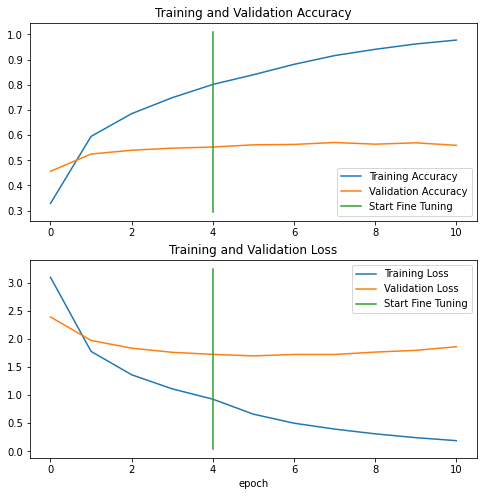

In [ ]:
# Compare histories before and after fine-tune
compare_historys(original_history=history_model_0,
                 new_history=history_model_0_fine_tune)

## 1. Train a feature-extraction transfer learning model for 10 epochs on the same data and compare its performance versus a model which used feature extraction for 5 epochs and fine-tuning for 5 epochs (like we've used in this notebook). Which method is better?

In [ ]:
# Import base model
base_model = tf.keras.applications.efficientnet.EfficientNetB1(include_top=False)
base_model.trainable = False

# Setup model architecture with trainable top layers
inputs = layers.Input(shape=IMG_SIZE+(3,), name='input_layer')
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D(name='global_avg_pooling_2D')(x)
outputs = layers.Dense(len(train_data_10_percent.class_names), activation='softmax', name='output_layer')(x)

# Build model
model_1 = tf.keras.Model(inputs, outputs, name='model_0')

# Check model summary
model_1.summary()

Model: "model_0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb1 (Functional)  (None, None, None, 1280)  6575239  
                                                                 
 global_avg_pooling_2D (Glob  (None, 1280)             0         
 alAveragePooling2D)                                             
                                                                 
 output_layer (Dense)        (None, 101)               129381    
                                                                 
Total params: 6,704,620
Trainable params: 129,381
Non-trainable params: 6,575,239
_________________________________________________________________


In [ ]:
# Compile model_1
model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_model_1 = model_1.fit(train_data_10_percent,
                              epochs=10,
                              validation_data=test_data,
                              validation_steps=int(0.15*len(test_data)))

Epoch 1/10
237/237 [==============================] - 73s 271ms/step - loss: 3.0960 - accuracy: 0.3336 - val_loss: 2.3846 - val_accuracy: 0.4653
Epoch 2/10
237/237 [==============================] - 62s 261ms/step - loss: 1.7681 - accuracy: 0.6000 - val_loss: 1.9585 - val_accuracy: 0.5331
Epoch 3/10
237/237 [==============================] - 62s 260ms/step - loss: 1.3556 - accuracy: 0.6838 - val_loss: 1.8036 - val_accuracy: 0.5482
Epoch 4/10
237/237 [==============================] - 62s 262ms/step - loss: 1.1058 - accuracy: 0.7493 - val_loss: 1.7465 - val_accuracy: 0.5527
Epoch 5/10
237/237 [==============================] - 62s 261ms/step - loss: 0.9222 - accuracy: 0.8045 - val_loss: 1.7148 - val_accuracy: 0.5567
Epoch 6/10
237/237 [==============================] - 63s 263ms/step - loss: 0.7808 - accuracy: 0.8399 - val_loss: 1.6780 - val_accuracy: 0.5606
Epoch 7/10
237/237 [==============================] - 63s 262ms/step - loss: 0.6678 - accuracy: 0.8721 - val_loss: 1.6667 - val_ac

In [ ]:
# Evaluate model_1
results_model_1 = model_1.evaluate(test_data)
results_model_1

790/790 [==============================] - 140s 177ms/step - loss: 1.4885 - accuracy: 0.6067


[1.4884917736053467, 0.6066930890083313]

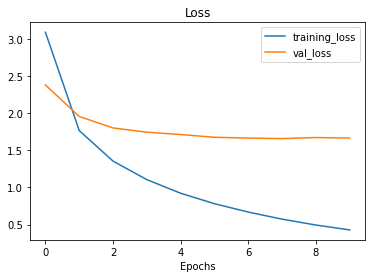

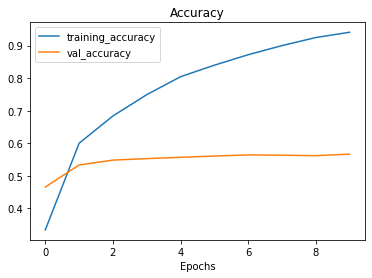

In [ ]:
# Plot loss curves of model_1
plot_loss_curves(history_model_1)

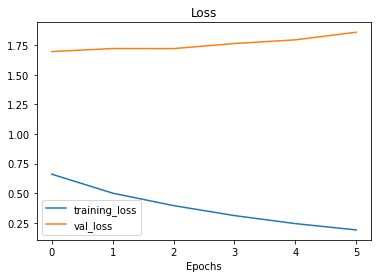

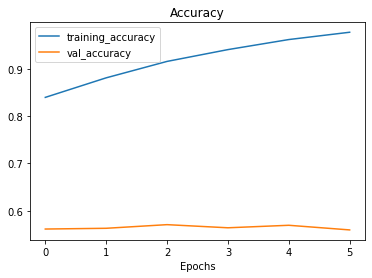

In [ ]:
# Plot loss curves of model_0 (only after fine-tune)
plot_loss_curves(history_model_0_fine_tune)

Looks like the **model_1** with training on 10 epochs performed better than **model_0**.

Though the results might get worse if we fine tune the model_1.

## 2. Recreate our first model (the feature extraction model) with [`mixed_precision`](https://www.tensorflow.org/guide/mixed_precision) turned on.

In [ ]:
# Set global policy to mixed precision
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy(policy='mixed_float16')

Your GPU may run slowly with dtype policy mixed_float16 because it does not have compute capability of at least 7.0. Your GPU:
  Tesla K80, compute capability 3.7
See https://developer.nvidia.com/cuda-gpus for a list of GPUs and their compute capabilities.
If you will use compatible GPU(s) not attached to this host, e.g. by running a multi-worker model, you can ignore this warning. This message will only be logged once


In [ ]:
# Build model with mixed percision
base_model_mp = tf.keras.applications.EfficientNetB1(include_top=False)
base_model_mp.trainable = False

# Setup model archietecture
inputs = layers.Input(shape=(224, 224, 3), name='input_layer')
x = base_model_mp(inputs, training=False) # set base model to inference model only
x = layers.GlobalAveragePooling2D(name='global_avg_pooling_layer')(x)
x = layers.Dense(len(train_data_10_percent.class_names))(x)

# Separate activation of output layer so we can output float32 activations
outputs = layers.Activation('softmax', dtype=tf.float32, name='softmax_float32_layer')(x)
model_mp = tf.keras.Model(inputs, outputs)

# Compile the model
model_mp.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

In [ ]:
# Check model summary
model_mp.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb1 (Functional)  (None, None, None, 1280)  6575239  
                                                                 
 global_avg_pooling_layer (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 101)               129381    
                                                                 
 softmax_float32_layer (Acti  (None, 101)              0         
 vation)                                                         
                                                                 
Total params: 6,704,620
Trainable params: 129,381
Non-trainab

In [ ]:
# Set initail epochs
INITIAL_EPOCHS = 5

# Fit the model
history_model_mp = model_mp.fit(train_data_10_percent,
                                epochs=INITIAL_EPOCHS,
                                steps_per_epoch=len(train_data_10_percent),
                                validation_data=test_data,
                                validation_steps=int(0.15*len(test_data)))

Epoch 1/5
237/237 [==============================] - 80s 255ms/step - loss: 3.0899 - accuracy: 0.3352 - val_loss: 2.3901 - val_accuracy: 0.4613
Epoch 2/5
237/237 [==============================] - 50s 209ms/step - loss: 1.7755 - accuracy: 0.5909 - val_loss: 1.9899 - val_accuracy: 0.5212
Epoch 3/5
237/237 [==============================] - 50s 209ms/step - loss: 1.3620 - accuracy: 0.6842 - val_loss: 1.8254 - val_accuracy: 0.5445
Epoch 4/5
237/237 [==============================] - 50s 209ms/step - loss: 1.1106 - accuracy: 0.7469 - val_loss: 1.7653 - val_accuracy: 0.5426
Epoch 5/5
237/237 [==============================] - 50s 208ms/step - loss: 0.9274 - accuracy: 0.8020 - val_loss: 1.7152 - val_accuracy: 0.5524


In [ ]:
# Unfreeze all layers
base_model_mp.trainable = True

# Refreeze layers again except for the last 7
for layer in base_model_mp.layers[:-7]:
  base_model_mp.trainable = False

In [ ]:
# Check which layers are trainable
for layer_num, layer in enumerate(base_model_mp.layers):
  print(layer_num, layer.name, layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block1b_dwconv False
18 block1b_bn False
19 block1b_activation False
20 block1b_se_squeeze False
21 block1b_se_reshape False
22 block1b_se_reduce False
23 block1b_se_expand False
24 block1b_se_excite False
25 block1b_project_conv False
26 block1b_project_bn False
27 block1b_drop False
28 block1b_add False
29 block2a_expand_conv False
30 block2a_expand_bn False
31 block2a_expand_activation False
32 block2a_dwconv_pad False
33 block2a_dwconv False
34 block2a_bn False
35 block2a_activation False
36 block2a_se_squeeze False
37 block2a_se_reshape False
38 block2a_se_reduce False
39 block2a_s

In [ ]:
# Recompile the model
model_mp.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                 metrics=['accuracy'])

In [ ]:
# Fine tune the model for another 5 epochs
fine_tune_epochs = INITIAL_EPOCHS + 5

# Fit the model
history_fine_tune_model_mp = model_mp.fit(train_data_10_percent,
                                          epochs=fine_tune_epochs,
                                          validation_data=test_data,
                                          validation_steps=int(0.15*len(test_data)),
                                          initial_epoch=history_model_mp.epoch[-1])

Epoch 5/10
237/237 [==============================] - 62s 218ms/step - loss: 0.7545 - accuracy: 0.8574 - val_loss: 1.6893 - val_accuracy: 0.5617
Epoch 6/10
237/237 [==============================] - 50s 208ms/step - loss: 0.7298 - accuracy: 0.8671 - val_loss: 1.6822 - val_accuracy: 0.5657
Epoch 7/10
237/237 [==============================] - 50s 209ms/step - loss: 0.7134 - accuracy: 0.8714 - val_loss: 1.6783 - val_accuracy: 0.5670
Epoch 8/10
237/237 [==============================] - 50s 208ms/step - loss: 0.6979 - accuracy: 0.8784 - val_loss: 1.6780 - val_accuracy: 0.5659
Epoch 9/10
237/237 [==============================] - 50s 209ms/step - loss: 0.6830 - accuracy: 0.8815 - val_loss: 1.6745 - val_accuracy: 0.5659
Epoch 10/10
237/237 [==============================] - 50s 208ms/step - loss: 0.6686 - accuracy: 0.8858 - val_loss: 1.6724 - val_accuracy: 0.5654


* **Does it make the model train faster?**

  It does help a little to train the model faster.

* **Does it effect the accuracy or performance of our model?**
  
  Not much thou, just by 1%

* **What's the advatanges of using `mixed_precision` training?**

  The major advantages of mixed percision is evident when we are training big models for longer epochs. In that case, we can spot a huge difference in our training time.

*Note: Running this in Google Colab, the GPU runtime typically has a P100 connected. The P100 has compute capability 6.0 and is not expected to show a significant speedup.*

In [ ]:
# Evaluate the model
results_fine_tune_model_mp = model_mp.evaluate(test_data)
results_fine_tune_model_mp

790/790 [==============================] - 119s 150ms/step - loss: 1.4796 - accuracy: 0.6148


[1.4795678853988647, 0.614811897277832]

## 3. Take 3 of your own photos of food and use the trained model to make predictions on them 🍔👁.

In [ ]:
# Get the class names
class_names = test_data.class_names

In [ ]:
# Set filepath of custom images
fish_img = '/content/fish.jpg'
steak_img = '/content/steak.jpg'
pizza_img = '/content/pizza.jpg'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def modified_pred_and_plot(model, filename, class_names):
    """
      Imports an image located at filename, makes a prediction on it with
      a trained model and plots the image with the predicted class as the title.
      Arge:
          model: trained model
          filename: image file
          class_names: binary-class names or multi-class names
      """
    # Import the target image and preprocess it
    img = load_and_prep_image(filename)

    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))

    # Add logic for binary-class and multi-class & get the predicted class name
    if len(pred[0]) > 1:
        pred_class = class_names[np.argmax(pred)]
    else:
        pred_class = class_names[int(tf.round(pred))]

    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f'Prediction: {pred_class}')
    plt.axis(False);

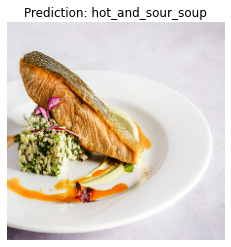

In [ ]:
# Get first prediction on fish image
modified_pred_and_plot(model=model_mp,
              filename=fish_img,
              class_names=class_names)

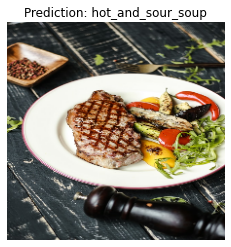

In [ ]:
# Get second prediction on steak image
modified_pred_and_plot(model=model_mp,
              filename=steak_img,
              class_names=class_names)

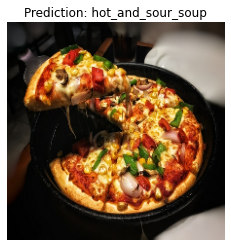

In [ ]:
# Get third prediction on pizza image
modified_pred_and_plot(model=model_mp,
              filename=pizza_img,
              class_names=class_names)

All wrong prediction!!

# 📖 Extra-curriculum

* Spend 15-minutes reading up on the [EarlyStopping callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping).

  **What does it do?**
  
  The purpose of earlystopping callback is to stop training when a monitored metric has stopped improving.
  
  **How could we use it in our model training?**
  
  If the goal is to maximize the training accuracy, we can set the metric to `accuracy` to monitor, and mode would be set as `max`. A `model.fit()` training loop will check at the end of every epoch whether the accuracy is no longer increasing. With that consideration the training will terminate according to the number of epochs with no imporvement, which can be set with `patience` parameter.

* Spend an hour reading about [Streamlit](https://www.streamlit.io/).

  **What does it do?**
  
  `Streamlit` is a great tool that lets us to deploy data science/machine learning models into web apps.

  **How might you integrate some of the things we've done in this notebook in a Streamlit app?**

  We can integrate our trained model with Streamlit and make live predictions on web app base environment.